In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('ID1_Data.csv')

df.head()

,DEPTH,LCAL,GR,RHOM,APLC,APLU
0,4242.9684,8.5405,143.0950,2.7511,0.1141,0.1276
1,4242.8160,8.5412,102.6287,2.6434,0.0932,0.1081
2,4242.6636,8.5606,62.5591,2.5636,0.0714,0.0871
3,4242.5112,8.5651,32.6639,2.5171,0.0631,0.0773
4,4242.3588,8.5860,23.8036,2.5064,0.0647,0.0771


In [3]:
df.describe()

,DEPTH,LCAL,GR,RHOM,APLC,APLU
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,4158.843600,9.085001,44.908459,2.513996,0.081039,0.096779
std,48.635462,0.923961,36.029336,0.096942,0.033103,0.046277
min,4074.718800,8.317700,16.434700,1.863900,0.041400,0.055700
25%,4116.781200,8.567600,25.003800,2.482400,0.062900,0.070400
50%,4158.843600,8.773600,29.739500,2.511800,0.072300,0.084100
75%,4200.906000,9.153400,46.498000,2.540300,0.086600,0.103900
max,4242.968400,14.100000,195.963900,2.828600,0.426200,0.484100


In [4]:
df.isnull().sum()

DEPTH    0
LCAL     0
GR       0
RHOM     0
APLC     0
APLU     0
dtype: int64

In [5]:
def plot_graphs(df):
    fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(10,7))
    color_lst = ['r','g','b','y','m']
    for i in range(df.shape[1]-1):
        ax[i].plot(df[df.columns[i+1]],df['DEPTH'],color = color_lst[i])
        ax[i].grid()
#         axTemp = plt.gca()
        ax[i].invert_yaxis()
        ax[i].set_title(df.columns[i+1])
        if i!=0:
            ax[i].set_yticklabels([])
    

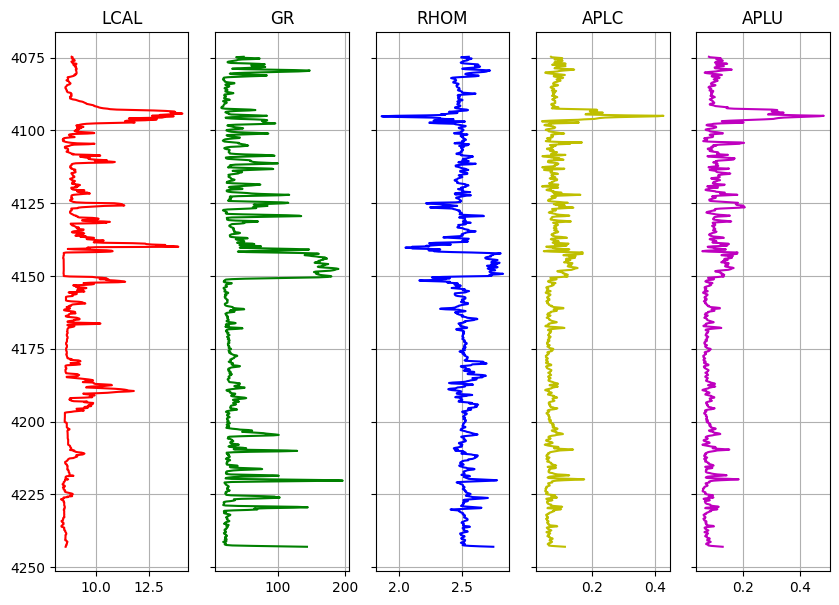

In [6]:
plot_graphs(df)

In [7]:
# Funciton to plot histogram
def plot_hist(df):
    color_lst = ['r','g','b','y','m']
    fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(12,3))
    for i in range(df.shape[1]-1):
        sns.histplot(df[df.columns[i+1]],kde =True,ax = ax[i],color=color_lst[i])
#         ax[i].hist(df[df.columns[i+1]])
#         ax[i].grid()
# #         axTemp = plt.gca()
# #         ax[i].invert_yaxis()
#         ax[i].set_title(df.columns[i+1])
#         if i!=0:
#             ax[i].set_yticklabels([])
    

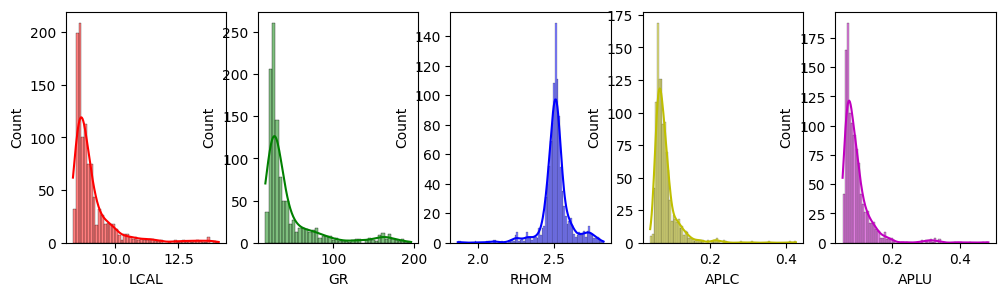

In [8]:
plot_hist(df)

In [23]:
def calliper_flag(bit_size,calliper_log):
    calliper_log = calliper_log.to_numpy()
    calliper_log.reshape(1,-1)
    
    flag = np.ones(calliper_log.shape)
    flag = np.where((calliper_log-bit_size) >2 , 0 , 1)
   
    return flag

In [24]:
bad_hole_flag = calliper_flag(8.5,df['LCAL'])
print(bad_hole_flag)

print(pd.Series(bad_hole_flag).value_counts())

[1 1 1 ... 1 1 1]
1    1029
0      76
dtype: int64


In [27]:
bad_hole_flag

array([nan, nan, nan, ..., nan, nan, nan])

Correct flag

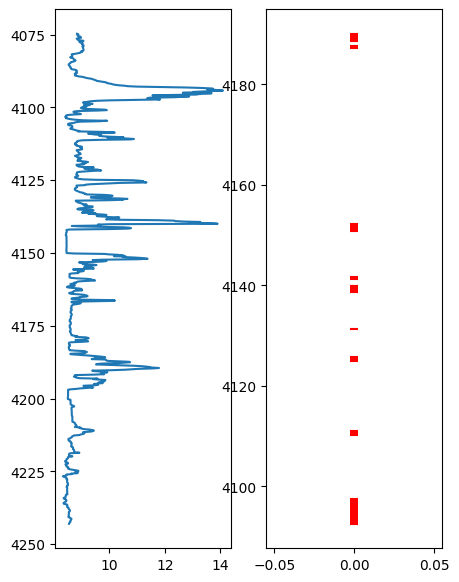

In [26]:
bad_hole_flag = np.where(bad_hole_flag==1,np.nan,0)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(5,7))
ax[0].plot(df['LCAL'],df['DEPTH'])
# ax = plt.gca()
ax[0].invert_yaxis()

ax[1].scatter(bad_hole_flag,df['DEPTH'],marker = '_',color = 'r')
# plt.grid()


# ticks = ['--']
# for i in range(len(bad_hole_flag)):
#     if bad_hole_flag[i] == 1:
# #     plt.scatter(bad_hole_flag,df['DEPTH'])
#         plt.yticks(df['DEPTH'].iloc[i],ticks)

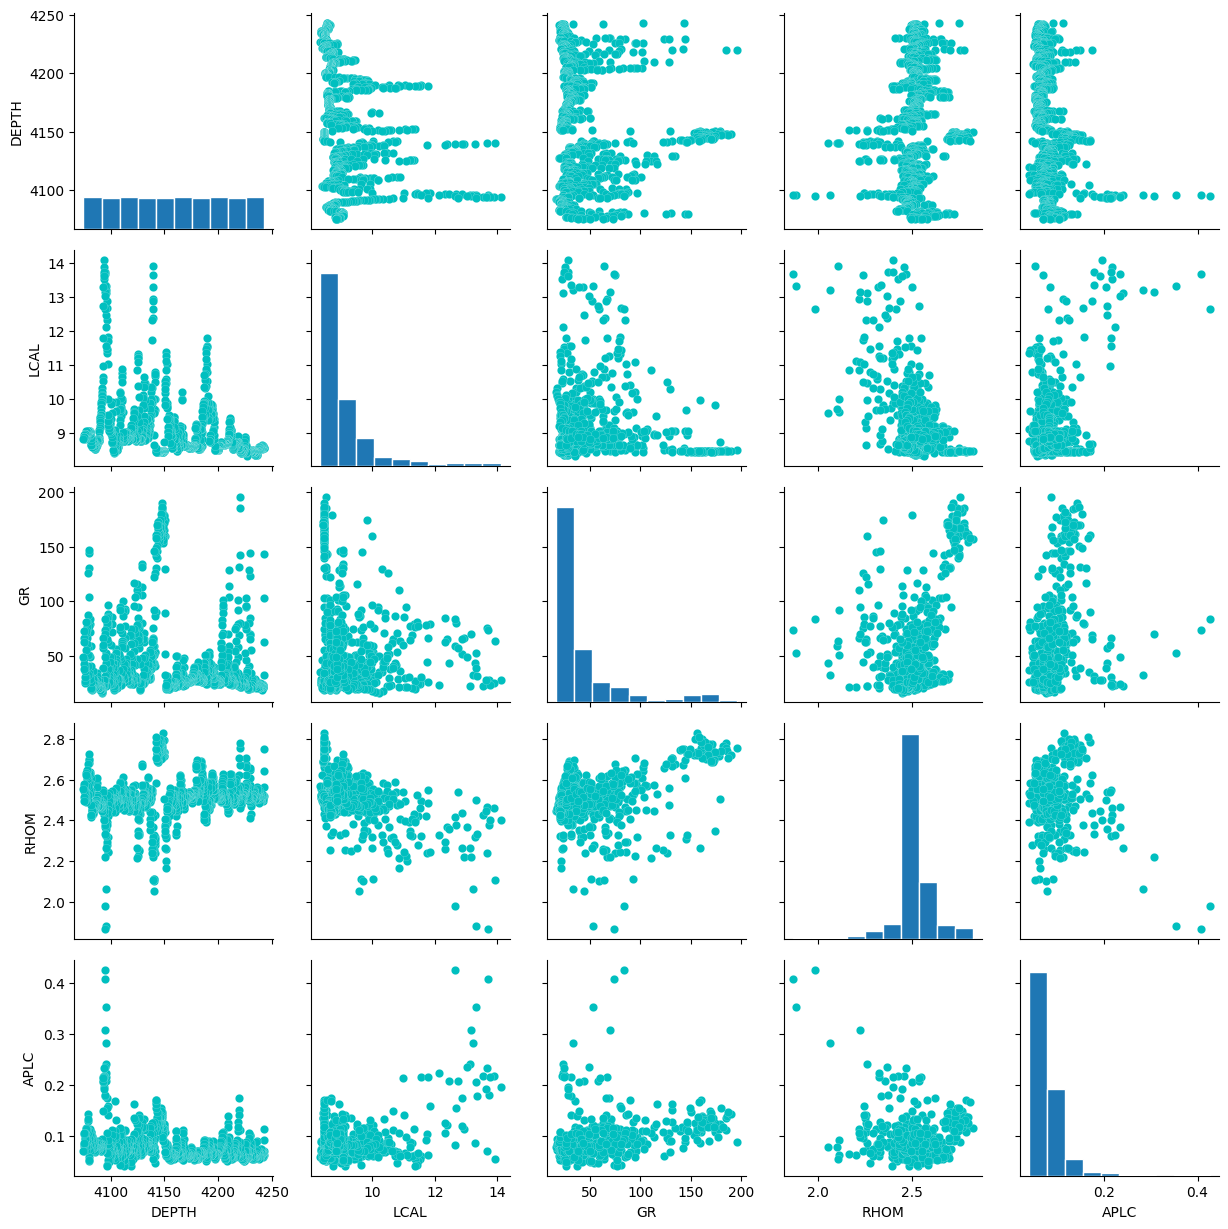

In [12]:
grid = sns.PairGrid(df, vars=['DEPTH','LCAL','GR','RHOM','APLC'] )
grid.map_diag(plt.hist, edgecolor='w')
grid.map_offdiag(plt.scatter, color='c', edgecolor='w',linewidth=0.1)

Text(0.5, 1.0, 'Borehole Flag')

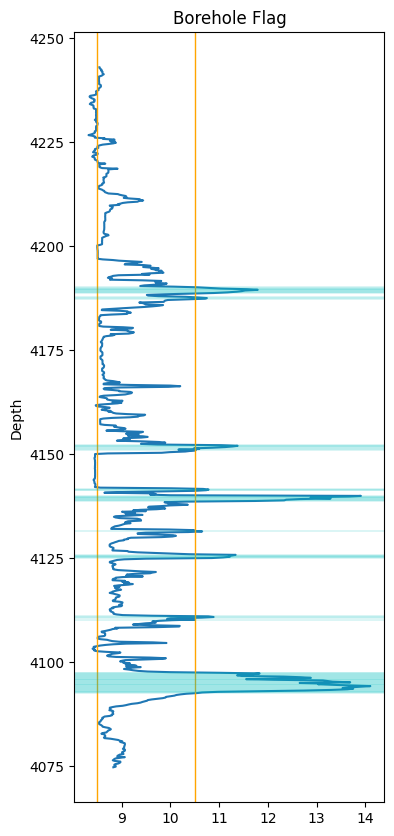

In [44]:
bad_hole_flag = np.where(bad_hole_flag==0,np.nan,1)
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,7))
bit_size = 8.5

plt.figure(figsize = (4,10))
plt.plot(df['LCAL'],df['DEPTH'])
# plt.plot(8.5*np.ones(df.shape[0]),df['DEPTH'])
plt.axvline(x = bit_size, color = 'orange' , linewidth = 1)
plt.axvline(x = bit_size + 2 ,color = 'orange',linewidth = 1)


bad_hole_flag_new = np.where((df['LCAL'] - bit_size)>2,df['DEPTH'],np.nan)

for i in range(len(bad_hole_flag_new)):
    plt.axhline(y = bad_hole_flag_new[i],color = 'c',linewidth = 0.2)
    
plt.ylabel('Depth')
plt.title('Borehole Flag')